Jacob Graham 

May 3, 2024


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl

In [2]:
out_path = 'sort_namd_energy_into_single_csv_out'

In [3]:
if os.path.exists(out_path) == False:
    os.mkdir(out_path)

# Read CSV Files Into Data Frame

In [4]:
# Read list of simulation names to be used as data labels and access files containing those names.
file_path = '../names.txt'
with open(file_path, 'r') as file:
    # Read the contents of the file.
    names = file.read()
    # Split the content into individual words based on whitespace.
    names = names.split()

In [5]:
# Sort nonbonded, van der waals, and electrostatic forces into 'pandas dataframes'
df_vdw = pd.DataFrame()
df_es = pd.DataFrame()
df_nb = pd.DataFrame()

for i, name in enumerate(names):
    csv_to_read = 'namdenergy_' + name + '.csv'
    if os.path.exists(csv_to_read)==0:
        names = names.remove(name)
    else:
        df = pd.read_csv(csv_to_read, delimiter=r"\s+")
        # Sort columns for van der waals, electrostatic, and total nonbonded energies into pandas dataframes.
        # Extract Vdw, Elec, and Nonbond column, and save them as pandas series.
        vdw_data = pd.Series(df['VdW'].values)
        es_data = pd.Series(df['Elec'].values)
        nb_data = pd.Series(df['Nonbond'].values)
        # Add columns to df_vdw, df_es, df_nb corresponding to values in the pandas series for current simulation, names[i].
        df_vdw[f'{name}'] = vdw_data
        df_es[f'{name}'] = es_data
        df_nb[f'{name}'] = nb_data

In [6]:
# Add time series data to all dataframes.
stride = 25000 # Time between dumping trajectory outputs.
time = range(0,df_nb.shape[0]*stride,stride)
df_vdw['Time (fs)'] = pd.Series(time)
df_es['Time (fs)'] = pd.Series(time)
df_nb['Time (fs)'] = pd.Series(time)

# Save to Excel Files

In [15]:
# Save pandas dataframes as csv files.
df_vdw.T.to_excel(f'{out_path}/VanDerWaals_energy.xlsx',index=True,header=False)
df_es.T.to_excel(f'{out_path}/Electrostatic_energy.xlsx',index=True,header=False)
df_nb.T.to_excel(f'{out_path}/TotalNonbonded_energy.xlsx',index=True,header=False)

# Make Plots

## Plot Total Nonbonded Energy

Text(0.5, 1.0, 'Total Nonbonded Energy')

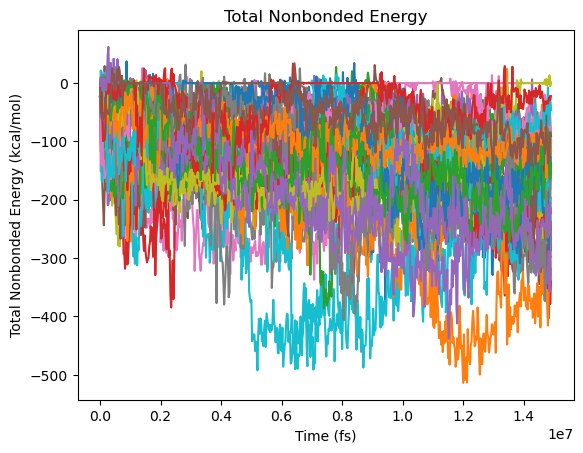

In [10]:
ax = df_nb.plot(x='Time (fs)',y=names,legend=None)
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Total Nonbonded Energy (kcal/mol)')
ax.set_title('Total Nonbonded Energy')

## Plot Total Electrostatic Energy

Text(0.5, 1.0, 'Total Electrostatic Energy')

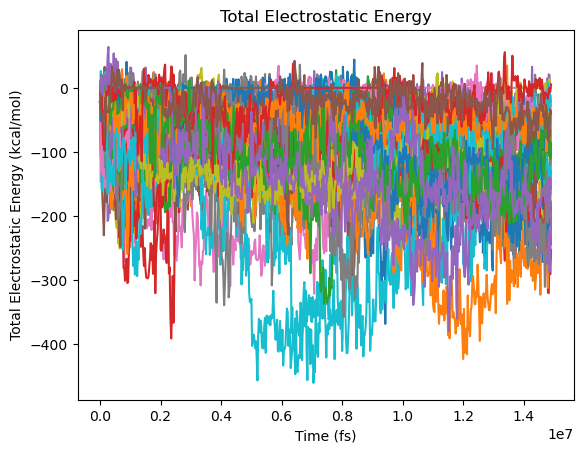

In [11]:
ax = df_es.plot(x='Time (fs)',y=names,legend=None)
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Total Electrostatic Energy (kcal/mol)')
ax.set_title('Total Electrostatic Energy')

## Plot Total Van Der Waals Energy

Text(0.5, 1.0, 'Total Van Der Waals Energy')

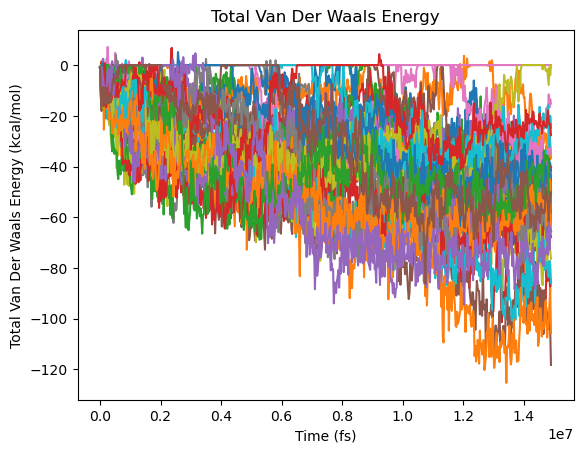

In [12]:
ax = df_vdw.plot(x='Time (fs)',y=names,legend=None)
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Total Van Der Waals Energy (kcal/mol)')
ax.set_title('Total Van Der Waals Energy')

In [9]:
import numpy as np

Average of 0d9027ac-f948-e759-f4da-27a2517c46d0: -77.4048986599665
Average of 3eb886fb-945f-d34d-1ccf-2c3be7efe32a: -89.22313132328308
Average of d1c9862c-c100-2852-74db-f5ea4b19eaba: -54.411979229480735
Average of 1e5dbfde-8081-5a68-80f8-98d14693d4f1: -107.55888241206031
Average of 96a80a1f-a6dd-e9f1-2958-62e1c259c5b5: -99.36913149606299
Average of 240bbb3f-af46-f294-9870-8d2ecc9b8461: -135.72179028475713
Average of 51f5dccc-f612-de0a-539e-725b99a4be70: -133.19051557788944
Average of f565b6bb-d242-78cb-3da2-a9b50d49c489: -59.345128355704695
Average of cedd36ea-cbf6-31c5-9505-43322ff79f26: -110.53578123953098
Average of 700630e0-c5c0-09d0-1db3-41d4527e3481: -201.32307319933
Average of 573893e9-33b7-edc9-714b-d2490b8c5f23: -113.0877701842546
Average of 81b15d74-ae8e-4f37-20ae-18361a093cf5: -91.31036800670016
Average of e98b4cd1-0e71-60a2-aafc-6267af80294f: -78.07968880455408
Average of 138d0ca4-32fd-d418-dbb4-4067f20ff1c9: -168.70190636515915
Average of 6cac5324-b9d3-13d7-9205-739e11fda

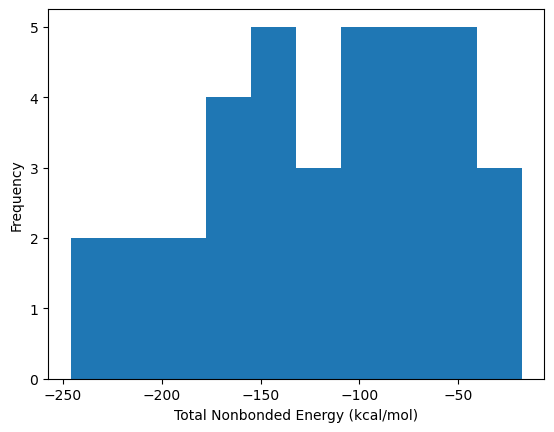

In [14]:
plot = plt.figure()
means = []
for i in range(len(names)):
    print(f"Average of {names[i]}: {df_nb[f'{names[i]}'].mean()}")
    means.append(df_nb[f'{names[i]}'].mean())
plt.hist(means)
plt.ylabel('Frequency')
plt.xlabel('Total Nonbonded Energy (kcal/mol)')
plt.show()